# Bar charts

This example shows how bar charts can be used to visualize the number of missing values in each variable. Bar charts can also be used to visualize any scalar (e.g., Number of values, Number of zero values or	Number of unique values).

## Includes: viz_data_quality and other libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt

from vizdataquality import calculate as vdqc, datasets as vdqd, plot as vdqp

## Get a dataframe's profile

In [2]:
num_rows, df = vdqd.get_dataset('missing 1')
df_output = vdqc.calc(df)
print('Number of rows =', num_rows)
column = 'Number of missing values'
print()
print(column)
print(df_output[column])

Number of rows = 10000

Number of missing values
_column
A        0
B        1
C     5000
D     9999
E    10000
Name: Number of missing values, dtype: int64


## Visualize the number of missing values

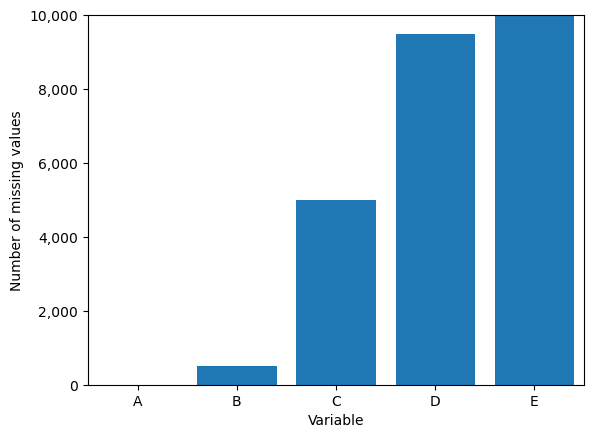

In [3]:
# Set the Y axis limit equal to the number of rows in the data frame
ax_kw = {'ylim': (0, num_rows)}
vdqp.scalar_bar(df_output[column], ax_kw=ax_kw)

## Customise the visualization

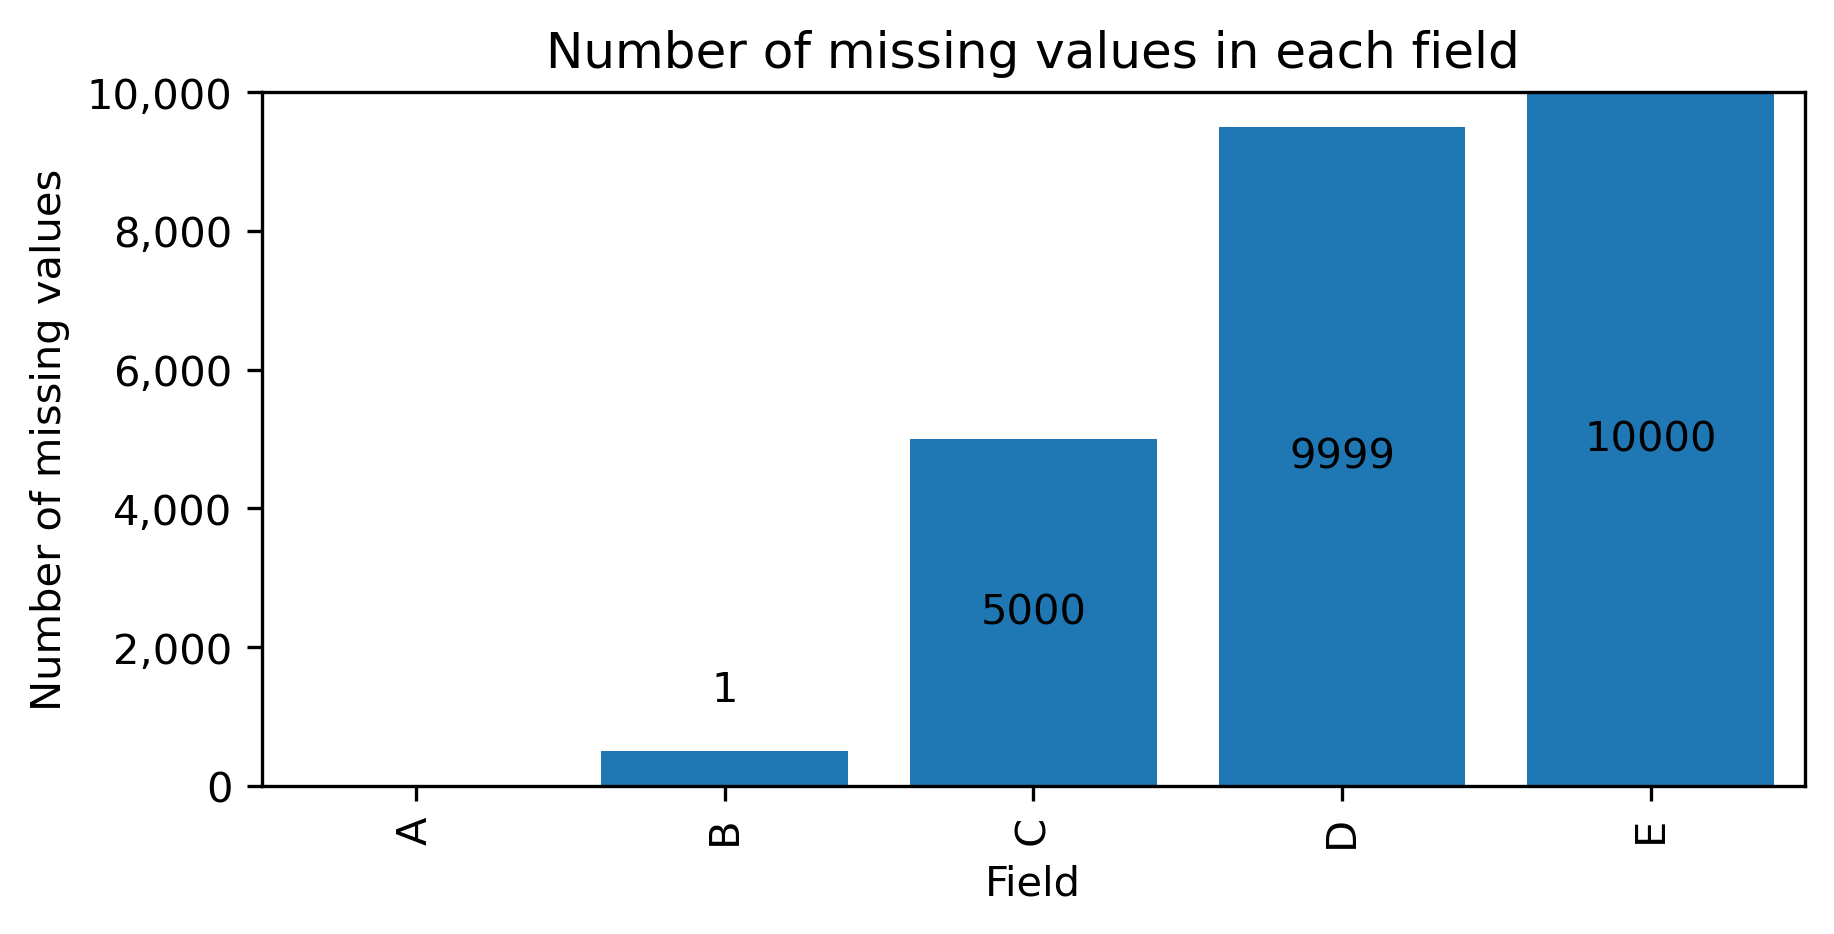

In [4]:
# A dictionary of keyword arguments that are passed to the Matplotlib Figure object
fig_kw = {'size_inches': (6, 3), 'dpi': 300, 'constrained_layout': True}
# A dictionary of keyword arguments that are passed to the Matplotlib Axes object
ax_kw = {'title': 'Number of missing values in each field', 'xlabel': 'Field',
               'ylim': (0, num_rows)}
# Rotate the X axis labels, save the plot to a file and apply the keyword arguments
vdqp.scalar_bar(df_output[column], xlabels_rotate=90, datalabels=True, filename='missing values.jpg', overwrite=False, fig_kw=fig_kw, ax_kw=ax_kw)

## Horizontal rather than vertical bars

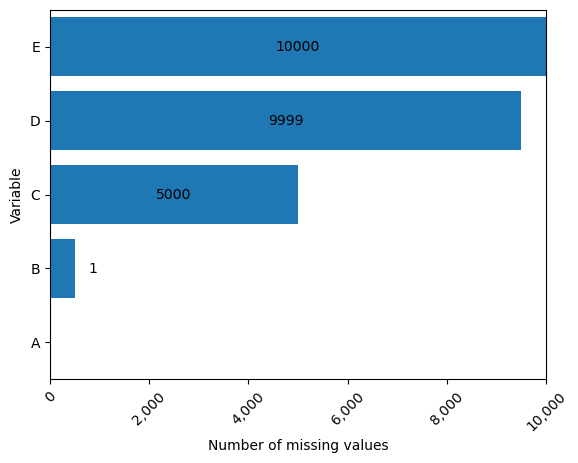

In [5]:
ax_kw = {'xlim': (0, num_rows)}
vdqp.scalar_bar(df_output[column], vert=False, xlabels_rotate=45, datalabels=True, ax_kw=ax_kw)

## The variables can be divided into multiple plots (useful if there are many variables)

### Multiple rows of plots

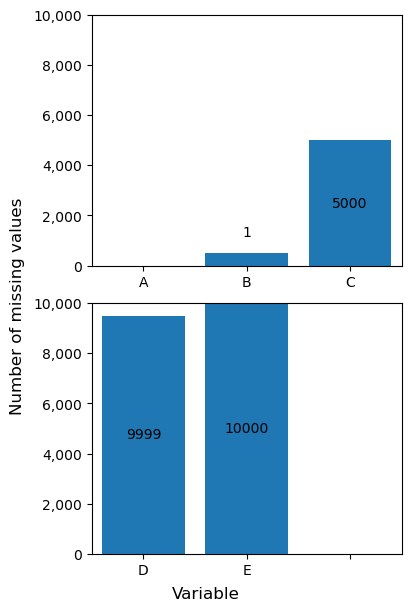

In [6]:
fig_kw = {'size_inches': (4, 6), 'constrained_layout': True}
ax_kw = {'ylim': (0, num_rows)}
vdqp.multiplot('bar', df_output[column], number_of_variables_per_row=3, datalabels=True, fig_kw=fig_kw, ax_kw=ax_kw)

### Multiple columns of plots

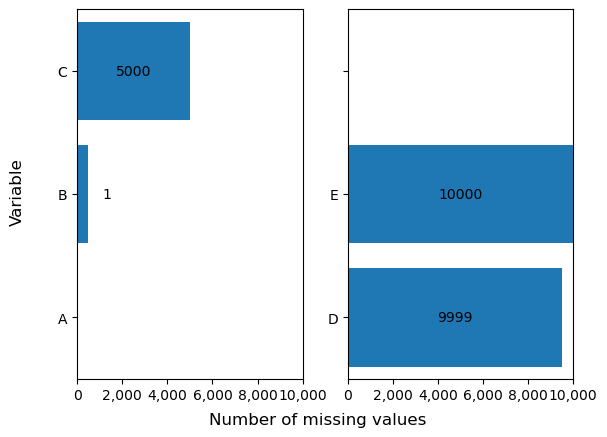

In [7]:
ax_kw = {'xlim': (0, num_rows)}
vdqp.multiplot('bar', df_output[column], number_of_variables_per_row=3, vert=False, datalabels=True, ax_kw=ax_kw)

## Perceptual discontinuity
If a normal bar chart is used then variable B's bar is not visible, because it only has one missing value and the bar chart does not have sufficient resolution to show that (the bar would only be a small fraction of a pixel high in this notebook or if saved as an image). Similarly, the heights of the bars for variables D and E appear to be identical even though D has one value whereas E has none.

The perceptual discontinuity version of the bar chart adjusts the length of the bars for variables B and D so differences between A and B, and D and E are easy to see.

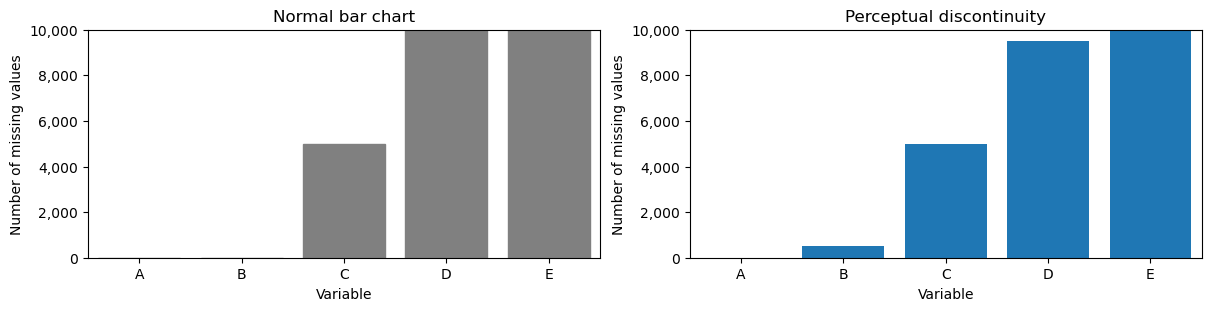

In [8]:
fig, axs = plt.subplots(1, 2)
fig_kw = {'size_inches': (12, 3), 'constrained_layout': True}
fig.set(**fig_kw)

ax_kw = {'title': 'Normal bar chart', 'ylim': (0, num_rows)}
vdqp.scalar_bar(df_output[column], perceptual_threshold=None, ax_input=axs[0], ax_kw=ax_kw, color='gray', edgecolor='gray')

ax_kw = {'title': 'Perceptual discontinuity', 'ylim': (0, num_rows)}
vdqp.scalar_bar(df_output[column], ax_input=axs[1], ax_kw=ax_kw)